# Prediction of a patient having lung cancer

Objetivo: o b jetivos

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

### Importando dados

In [2]:
df_cancer = pd.read_csv('tratative\\data_tratative.csv')
display(df_cancer.head())
display(df_cancer.tail())

,Unnamed: 0,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue_,allergy_,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


,Unnamed: 0,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue_,allergy_,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
271,279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
272,280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
273,281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
274,282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0
275,283,1,60,0,1,1,0,0,1,0,1,1,1,1,1,1,1


In [3]:
df_cancer = df_cancer.drop(columns='Unnamed: 0')

# Regressão logistica.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

## Feature selection.

## Criando o modelo

In [5]:
#Separando a feature
df_cancer_x = df_cancer[df_cancer.columns[:-1]]

#Iniciando objetos
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

#Normalizando
df_cancer_x_standard = pd.DataFrame(standard_scaler.fit_transform(df_cancer_x))
df_cancer_x_minmax = pd.DataFrame(min_max_scaler.fit_transform(df_cancer_x))

#separando a target
df_cancer_y = df_cancer[df_cancer.columns[-1]]

In [6]:
#dividindo em treino e teste para normalização standard
x_train, x_test, y_train, y_test = train_test_split(df_cancer_x_standard, df_cancer_y, train_size=0.7, random_state=0)

lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

r_sq = lr_model.score(x_test, y_test)
print('Acurácia:', r_sq) 

Acurácia: 0.8795180722891566


## Avaliando o modelo

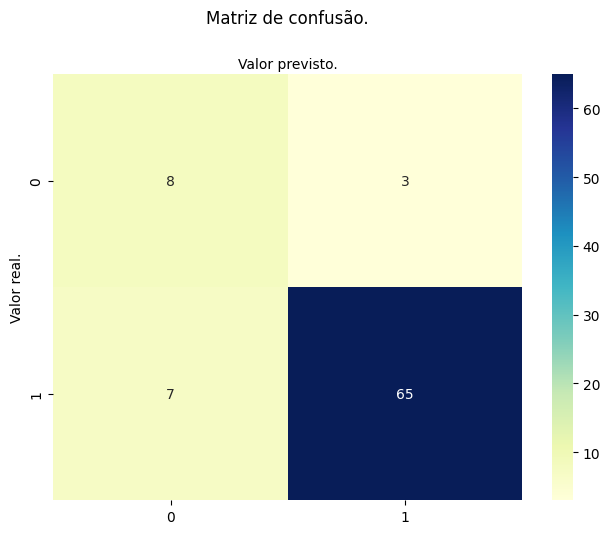

In [7]:
#Criando matriz de confusao
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# name  of classes
class_names=['Não doente', 'Doente'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão.', y=1.1)
plt.ylabel('Valor real.')
plt.xlabel('Valor previsto.')
plt.show()

In [8]:
from sklearn.metrics import classification_report
target_names = ['sem cancer de pulmao', 'com cancer de pulmao']
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

sem cancer de pulmao       0.53      0.73      0.62        11
com cancer de pulmao       0.96      0.90      0.93        72

            accuracy                           0.88        83
           macro avg       0.74      0.82      0.77        83
        weighted avg       0.90      0.88      0.89        83



O recall é o métrica mais importante para avaliar o modelo, pois ela retorna a proporção de paciente que o modelo conseguiu prever corratamente. Ou seja retorna a quantidade de informação de pessoas que estão doentes e foram classificadas com doentes.

Nesse sentido o modelo tem uma boa previsão para falsos positivos.

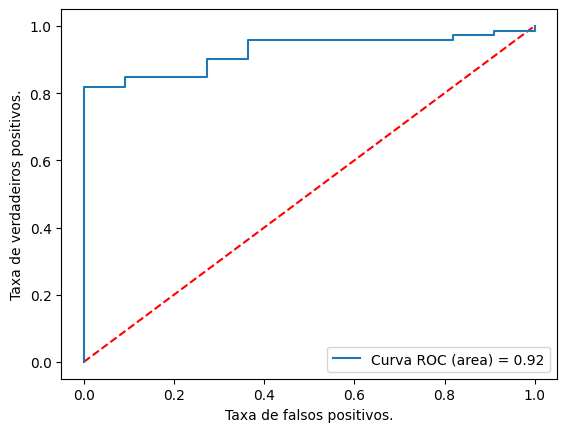

In [9]:
y_pred_proba = lr_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.plot(fpr,tpr,label=f"Curva ROC (area) = {auc:.2f}")
plt.xlabel('Taxa de falsos positivos.')
plt.ylabel('Taxa de verdadeiros positivos.')
plt.legend(loc='best')
plt.show()

A curva ROC teve um ótimo valor, signigica que ela consegue separar bem as classes.

In [10]:
#dividindo em treino e teste para normalização min_max
x_train, x_test, y_train, y_test = train_test_split(df_cancer_x_minmax, df_cancer_y, train_size=0.8, random_state=0)

lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

r_sq = lr_model.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8928571428571429


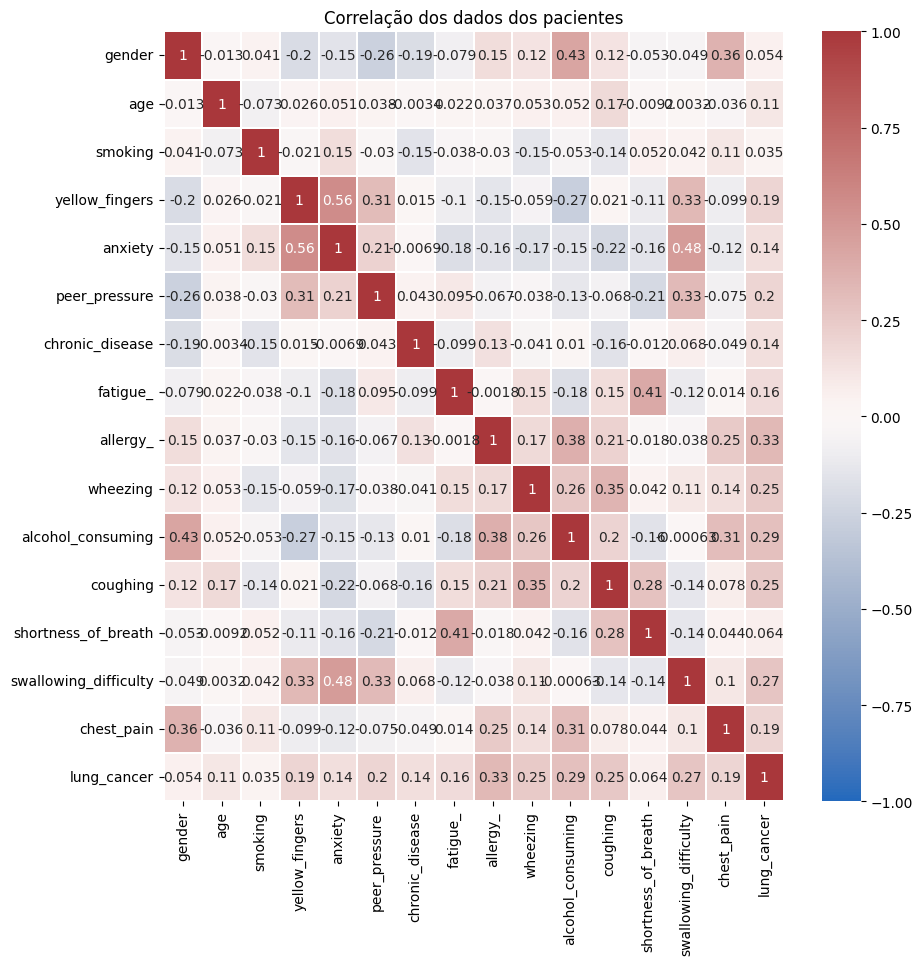

In [11]:
plt.figure(figsize = (10, 10))
plt.title('Correlação dos dados dos pacientes')
sns.heatmap(df_cancer.corr(), vmin = -1, cmap = sns.color_palette("vlag", as_cmap=True), linewidths= 0.1, linecolor='white', annot= True)
plt.show()

In [12]:
df_cancer2 = df_cancer.copy()
df_cancer2.drop(columns = 'age', inplace = True)

In [13]:
frq_cancer = apriori(df_cancer2, min_support = 0.4, use_colnames = True)
frq_cancer

c:\Users\abraz\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.514493,(gender)
1,0.543478,(smoking)
2,0.576087,(yellow_fingers)
3,0.496377,(anxiety)
4,0.507246,(peer_pressure)
5,0.521739,(chronic_disease)
6,0.663043,(fatigue_)
7,0.547101,(allergy_)
8,0.547101,(wheezing)
9,0.550725,(alcohol_consuming)


In [14]:
rules = association_rules(frq_cancer, metric = 'confidence', min_threshold= 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gender),(lung_cancer),0.514493,0.862319,0.452899,0.880282,1.020831,0.009242,1.150043
1,(smoking),(lung_cancer),0.543478,0.862319,0.474638,0.873333,1.012773,0.005986,1.086957
2,(anxiety),(yellow_fingers),0.496377,0.576087,0.423913,0.854015,1.482440,0.137957,2.903804
3,(yellow_fingers),(anxiety),0.576087,0.496377,0.423913,0.735849,1.482440,0.137957,1.906573
4,(yellow_fingers),(lung_cancer),0.576087,0.862319,0.528986,0.918239,1.064849,0.032215,1.683946
5,(anxiety),(lung_cancer),0.496377,0.862319,0.452899,0.912409,1.058087,0.024863,1.571860
6,(peer_pressure),(lung_cancer),0.507246,0.862319,0.471014,0.928571,1.076831,0.033606,1.927536
7,(chronic_disease),(lung_cancer),0.521739,0.862319,0.474638,0.909722,1.054972,0.024732,1.525084
8,(coughing),(fatigue_),0.576087,0.663043,0.416667,0.723270,1.090834,0.034696,1.217638
9,(fatigue_),(shortness_of_breath),0.663043,0.630435,0.510870,0.770492,1.222159,0.092864,1.610248


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ee7a355-6010-4bf6-9c15-7375482899c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>